#Electric Vehicle Market Segmentation: A Data-Driven Approach for Strategic Decision Making

##Importing Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

##Loading Data

In [48]:
df=pd.read_csv("EV Categories Sales.csv")

##Data Health Check

In [49]:
df

,Vehicle Category,2024,2023,2022,2021,2020,2019,2018,2017,2016
0,FOUR WHEELER (INVALID CARRIAGE),37,47,13,3,0,0,0,0,4
1,HEAVY GOODS VEHICLE,194,327,0,0,0,0,0,1,8
2,HEAVY MOTOR VEHICLE,0,3,2,6,0,0,0,1,8
3,HEAVY PASSENGER VEHICLE,3396,2397,1962,921,53,371,36,9,3
4,LIGHT GOODS VEHICLE,5737,2283,328,987,13,59,759,907,93
5,LIGHT MOTOR VEHICLE,67407,73298,33267,12313,3280,1034,1158,925,717
6,LIGHT PASSENGER VEHICLE,6434,9282,4974,716,933,701,578,301,77
7,MEDIUM MOTOR VEHICLE,20,6,0,0,0,0,2,0,1
8,MEDIUM PASSENGER VEHICLE,37,289,25,254,35,130,7,4,0
9,OTHER THAN MENTIONED ABOVE,3,279,2478,1789,847,692,452,367,568


In [50]:
# Geting an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Vehicle Category  15 non-null     object
 1   2024              15 non-null     int64 
 2   2023              15 non-null     int64 
 3   2022              15 non-null     int64 
 4   2021              15 non-null     int64 
 5   2020              15 non-null     int64 
 6   2019              15 non-null     int64 
 7   2018              15 non-null     int64 
 8   2017              15 non-null     int64 
 9   2016              15 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.3+ KB


In [51]:
# Checking for duplicate rows
df.duplicated().sum()


np.int64(0)

In [52]:
df["Vehicle Category"].unique()   #Checking for Unique Categories in 'Vehicle Category'

array(['FOUR WHEELER (INVALID CARRIAGE)', 'HEAVY GOODS VEHICLE',
       'HEAVY MOTOR VEHICLE', 'HEAVY PASSENGER VEHICLE',
       'LIGHT GOODS VEHICLE', 'LIGHT MOTOR VEHICLE',
       'LIGHT PASSENGER VEHICLE', 'MEDIUM MOTOR VEHICLE',
       'MEDIUM PASSENGER VEHICLE', 'OTHER THAN MENTIONED ABOVE',
       'THREE WHEELER(NT)', 'THREE WHEELER(T)',
       'TWO WHEELER (INVALID CARRIAGE)', 'TWO WHEELER(NT)',
       'TWO WHEELER(T)'], dtype=object)

In [53]:
# Geting summary statistics
df.describe()

,2024,2023,2022,2021,2020,2019,2018,2017,2016
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,97156.733333,102161.800000,68333.266667,22142.333333,8311.400000,11125.733333,8682.666667,5825.933333,3321.266667
std,240182.548400,257193.032586,178741.433090,54545.479408,23693.219451,34609.523352,28368.293389,21443.718732,12059.213120
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.500000,151.000000,13.500000,6.500000,1.000000,14.500000,4.500000,1.000000,2.000000
50%,273.000000,327.000000,437.000000,716.000000,53.000000,134.000000,110.000000,9.000000,8.000000
75%,6085.500000,5839.500000,4501.500000,2111.500000,1515.000000,867.500000,668.500000,637.000000,330.500000
max,727021.000000,858312.000000,627369.000000,158623.000000,90267.000000,133360.000000,110056.000000,83322.000000,46888.000000


The data appears clean with no duplicates. The descriptive statistics show wide variation in sales figures across categories and years, suggesting some vehicle types are much more popular than others.

In [54]:
df.columns = df.columns.str.strip()  # Removing spaces in column names
df["Vehicle Category"] = df["Vehicle Category"].str.strip()  # Removing spaces in data

##EDA

In [55]:
# Renaming Vehicle categories name in short form for better visualligation
df['Vehicle Category'] = df['Vehicle Category'].replace({
    'FOUR WHEELER (INVALID CARRIAGE)': '4-Wheeler (IV)',
    'HEAVY GOODS VEHICLE': 'HGV',
    'HEAVY MOTOR VEHICLE': 'HMV',
    'HEAVY PASSENGER VEHICLE': 'HPV',
    'LIGHT GOODS VEHICLE': 'LGV',
    'LIGHT MOTOR VEHICLE': 'LMV',
    'LIGHT PASSENGER VEHICLE': 'LPV',
    'MEDIUM MOTOR VEHICLE': 'MMV',
    'MEDIUM PASSENGER VEHICLE': 'MPV',
    'OTHER THAN MENTIONED ABOVE': 'Other',
    'THREE WHEELER(NT)': '3-Wheeler (NT)',
    'THREE WHEELER(T)': '3-Wheeler (T)',
    'TWO WHEELER (INVALID CARRIAGE)': '2-Wheeler (IV)',
    'TWO WHEELER(NT)': '2-Wheeler (NT)',
    'TWO WHEELER(T)': '2-Wheeler (T)'
})

df

,Vehicle Category,2024,2023,2022,2021,2020,2019,2018,2017,2016
0,4-Wheeler (IV),37,47,13,3,0,0,0,0,4
1,HGV,194,327,0,0,0,0,0,1,8
2,HMV,0,3,2,6,0,0,0,1,8
3,HPV,3396,2397,1962,921,53,371,36,9,3
4,LGV,5737,2283,328,987,13,59,759,907,93
5,LMV,67407,73298,33267,12313,3280,1034,1158,925,717
6,LPV,6434,9282,4974,716,933,701,578,301,77
7,MMV,20,6,0,0,0,0,2,0,1
8,MPV,37,289,25,254,35,130,7,4,0
9,Other,3,279,2478,1789,847,692,452,367,568


In [56]:
top_2024 = df[['Vehicle Category', '2024']].sort_values('2024', ascending=False)
print("\nTop Categories in 2024:\n", top_2024.head())


Top Categories in 2024:
    Vehicle Category    2024
13   2-Wheeler (NT)  727021
11    3-Wheeler (T)  645001
5               LMV   67407
6               LPV    6434
4               LGV    5737


<ipython-input-57-787f5ffde098>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




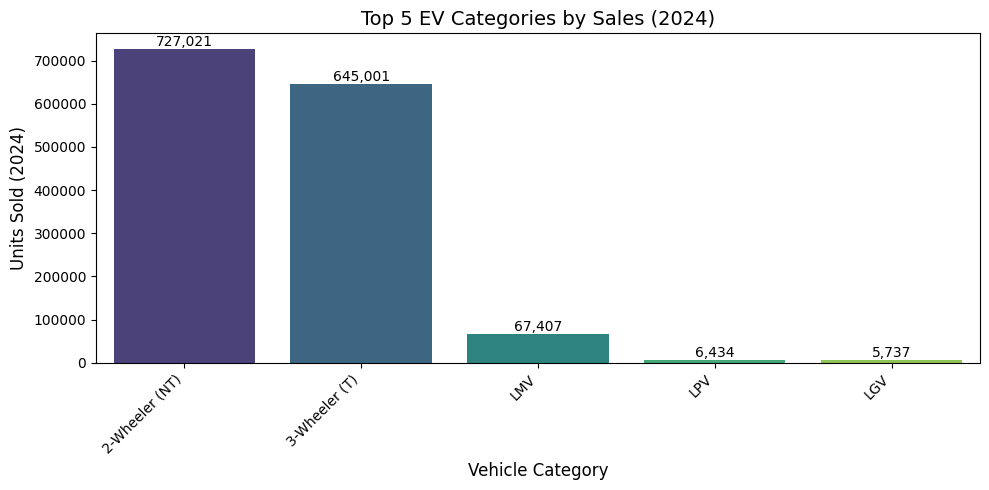

In [57]:
# Geting top 5 categories by 2024 sales
top_2024 = df[['Vehicle Category', '2024']].sort_values('2024', ascending=False).head(5)

# Creating bar plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_2024,
    x='Vehicle Category',
    y='2024',
    palette='viridis'
)

# Adding labels and title
plt.title('Top 5 EV Categories by Sales (2024)', fontsize=14)
plt.xlabel('Vehicle Category', fontsize=12)
plt.ylabel('Units Sold (2024)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Displaying exact counts on bars
for index, value in enumerate(top_2024['2024']):
    plt.text(index, value, f'{value:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**The visualization clearly shows that two-wheelers (non-transport) and three-wheelers (transport) dominate the EV market by a huge margin in 2024. These categories should be the primary focus for manufacturers due to their high demand.**

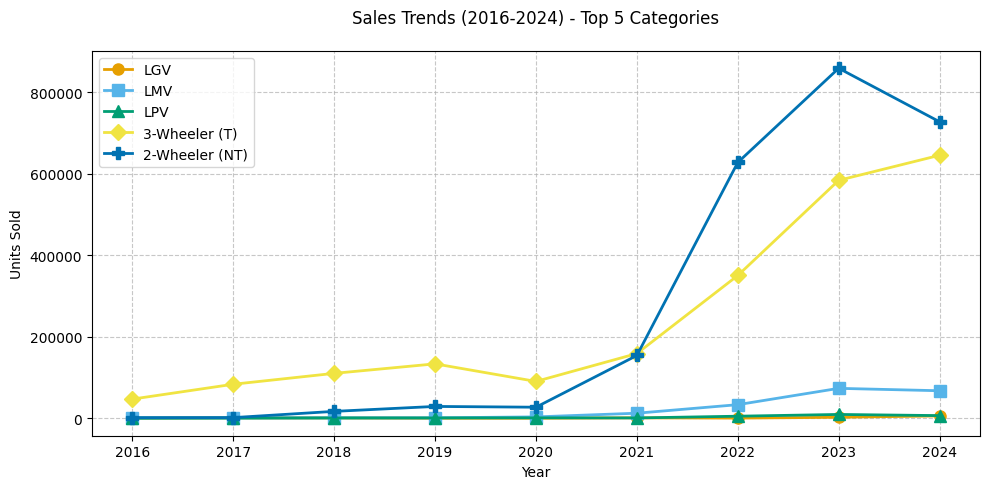

In [58]:
# Seting color
colors = [
    '#E69F00',  # Orange
    '#56B4E9',  # Sky Blue
    '#009E73',  # Bluish Green
    '#F0E442',  # Yellow
    '#0072B2',  # Blue
    '#D55E00',  # Vermillion
    '#CC79A7',  # Reddish Purple
]

# Geting top 5 categories by 2024 sales
top_categories = df.nlargest(5, '2024')['Vehicle Category']
df_filtered = (
    df[df['Vehicle Category'].isin(top_categories)]
    .set_index('Vehicle Category')
    .T
    .iloc[::-1]
)

# Ploting with distinct colors + markers
fig, ax = plt.subplots(figsize=(10, 5))
markers = ['o', 's', '^', 'D', 'P', '*', 'X']

for i, (col, color, marker) in enumerate(zip(df_filtered.columns, colors, markers)):
    df_filtered[col].plot(
        ax=ax,
        linewidth=2,
        marker=marker,
        markersize=8,
        color=color,
        label=col
    )

plt.title('Sales Trends (2016-2024) - Top 5 Categories', pad=20)
plt.ylabel('Units Sold')
plt.xlabel('Year')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [59]:
#Defining function for CGR Calculation
def cgr(current, past, years):
    if past == 0:
        return np.nan
    return ((current / past) ** (1/years) - 1) * 100

# Creating new DataFrame
new_df = pd.DataFrame({
    'Vehicle Category': df['Vehicle Category'],
    '2016 Sales': df['2016'],
    '2024 Sales': df['2024']
})

# Calculating growth rates
new_df['1-Year CGR'] = (df['2024'] / df['2023'].replace(0, np.nan) - 1) * 100
new_df['3-Year CGR'] = [cgr(row['2024'], row['2021'], 3) for _, row in df.iterrows()]
new_df['5-Year CGR'] = [cgr(row['2024'], row['2019'], 5) for _, row in df.iterrows()]
new_df['Overall CGR'] = [cgr(row['2024'], row['2016'], 8) for _, row in df.iterrows()]

# Calculating stability (std dev)
year_cols = [str(y) for y in range(2016, 2025)]
new_df['Sales Stability'] = df[year_cols].std(axis=1)

# Formatting
for col in new_df.filter(like='CGR'):
    new_df[col] = new_df[col].round(2)

# Reset index
new_df = new_df.reset_index(drop=True)

new_df

,Vehicle Category,2016 Sales,2024 Sales,1-Year CGR,3-Year CGR,5-Year CGR,Overall CGR,Sales Stability
0,4-Wheeler (IV),4,37,-21.28,131.04,NaN,32.06,17.924223
1,HGV,8,194,-40.67,NaN,NaN,48.97,119.068724
2,HMV,8,0,-100.00,-100.00,NaN,-100.00,2.948634
3,HPV,3,3396,41.68,54.49,55.71,140.84,1265.874807
4,LGV,93,5737,151.29,79.80,149.79,67.41,1829.096635
5,LMV,717,67407,-8.04,76.24,130.59,76.46,29650.535011
6,LPV,77,6434,-30.68,107.90,55.79,73.88,3365.617469
7,MMV,1,20,233.33,NaN,NaN,45.42,6.591240
8,MPV,0,37,-87.20,-47.38,-22.22,NaN,112.053311
9,Other,568,3,-98.92,-88.12,-66.32,-48.08,795.954005


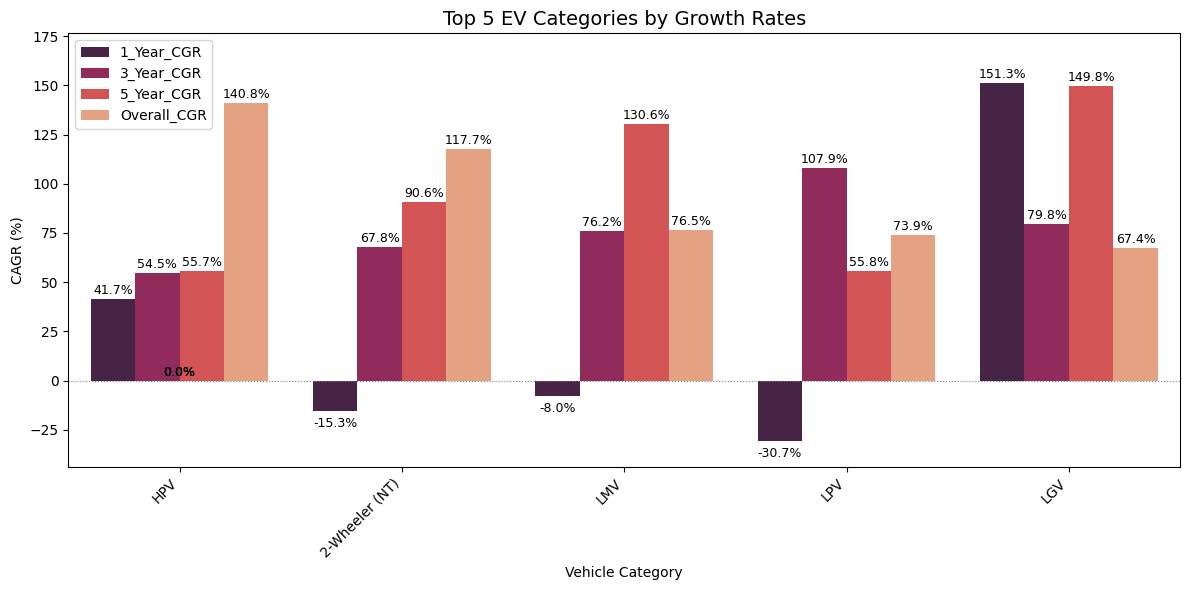

In [60]:
# Preparing the data correctly

growth_columns = {
    '1-Year CGR': '1_Year_CGR',
    '3-Year CGR': '3_Year_CGR',
    '5-Year CGR': '5_Year_CGR',
    'Overall CGR': 'Overall_CGR'
}

# Renaming columns
new_df_clean = new_df.rename(columns=growth_columns)

# Filtering and melting the data
top_cgr = new_df_clean[new_df_clean['Overall_CGR'] > 0].nlargest(5, 'Overall_CGR')

plot_data = top_cgr.melt(
    id_vars='Vehicle Category',
    value_vars=list(growth_columns.values()),
    var_name='Growth_Period',
    value_name='CAGR'
)

# Creating the plot with proper column references
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=plot_data,
    x='Vehicle Category',
    y='CAGR',
    hue='Growth_Period',
    palette='rocket'
)

# value labeling
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        va = 'bottom' if height >= 0 else 'top'
        y_offset = 1 if height >= 0 else -3
        ax.text(
            p.get_x() + p.get_width()/2.,
            height + y_offset,
            f'{height:.1f}%',
            ha='center',
            va=va,
            fontsize=9,
            color='black'
        )

plt.title('Top 5 EV Categories by Growth Rates', fontsize=14)
plt.xlabel('Vehicle Category')
plt.ylabel('CAGR (%)')
plt.xticks(rotation=45, ha='right')

# Adding zero reference line
plt.axhline(0, color='gray', linestyle=':', linewidth=0.8)

# Adjusting y-axis limits to accommodate labels
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin - 0.1*abs(ymin), ymax + 0.1*ymax)

plt.legend()
plt.tight_layout()
plt.show()

In [61]:
# Creating final_df by removing NaN and negative CGR values
final_df = new_df[
    (new_df['5-Year CGR'].notna()) &
    (new_df['5-Year CGR'] >= 0)  # Keep only non-negative CGR
].copy()

# Verifying cleaning
print(f"Removed {len(new_df) - len(final_df)} rows")
print("final_df shape:", final_df.shape)

Removed 7 rows
final_df shape: (8, 8)


In [62]:
final_df

,Vehicle Category,2016 Sales,2024 Sales,1-Year CGR,3-Year CGR,5-Year CGR,Overall CGR,Sales Stability
3,HPV,3,3396,41.68,54.49,55.71,140.84,1265.874807
4,LGV,93,5737,151.29,79.80,149.79,67.41,1829.096635
5,LMV,717,67407,-8.04,76.24,130.59,76.46,29650.535011
6,LPV,77,6434,-30.68,107.90,55.79,73.88,3365.617469
10,3-Wheeler (NT),13,273,12.35,12.84,15.30,46.31,133.031429
11,3-Wheeler (T),46888,645001,10.54,59.61,37.06,38.78,227234.346018
13,2-Wheeler (NT),1439,727021,-15.30,67.79,90.56,117.74,357353.927725
14,2-Wheeler (T),0,1780,-15.84,-9.91,4.26,NaN,1325.402245


In [63]:
# Preparing final_df (replace NaN with 0)
final_df = new_df.copy()
final_df.fillna(0, inplace=True)  # Replace all NaN with 0

In [64]:
final_df

,Vehicle Category,2016 Sales,2024 Sales,1-Year CGR,3-Year CGR,5-Year CGR,Overall CGR,Sales Stability
0,4-Wheeler (IV),4,37,-21.28,131.04,0.00,32.06,17.924223
1,HGV,8,194,-40.67,0.00,0.00,48.97,119.068724
2,HMV,8,0,-100.00,-100.00,0.00,-100.00,2.948634
3,HPV,3,3396,41.68,54.49,55.71,140.84,1265.874807
4,LGV,93,5737,151.29,79.80,149.79,67.41,1829.096635
5,LMV,717,67407,-8.04,76.24,130.59,76.46,29650.535011
6,LPV,77,6434,-30.68,107.90,55.79,73.88,3365.617469
7,MMV,1,20,233.33,0.00,0.00,45.42,6.591240
8,MPV,0,37,-87.20,-47.38,-22.22,0.00,112.053311
9,Other,568,3,-98.92,-88.12,-66.32,-48.08,795.954005


In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Selecting only numerical columns
numerical_cols = final_df.select_dtypes(include=[np.number]).columns
ev_values = final_df[numerical_cols].values

# Standardize the data
scaler = StandardScaler()
ev_values_scaled = scaler.fit_transform(ev_values)

# Performing PCA
pca_model = PCA()
ev_pca_transformed = pca_model.fit_transform(ev_values_scaled)
ev_pca_fit = pca_model.fit(ev_values_scaled)

# Calculating metrics
std_dev = np.sqrt(pca_model.explained_variance_)
prop_variance = pca_model.explained_variance_ratio_

# Creating summary DataFrame
pc_index = [f"PC{i+1}" for i in range(len(std_dev))]
summary_df = pd.DataFrame({
    "Standard Deviation": std_dev,
    "Proportion of Variance": prop_variance,
    "Cumulative Proportion": prop_variance.cumsum()
}, index=pc_index)
summary_df

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,1.865591,0.464057,0.464057
PC2,1.446364,0.278929,0.742986
PC3,0.887927,0.105122,0.848108
PC4,0.745386,0.074080,0.922188
PC5,0.632508,0.053342,0.975530
PC6,0.428383,0.024468,0.999999
PC7,0.003257,0.000001,1.000000


In [66]:
# Preparing the standardized data
ev_values_scaled = scaler.fit_transform(final_df.select_dtypes(include=[np.number]))

# Performing PCA
pca_model = PCA()
ev_pca_transformed = pca_model.fit_transform(ev_values_scaled)


# Creating rotation matrix
rotation_matrix = pca_model.components_.T
rot_df = pd.DataFrame(
    rotation_matrix,
    index=final_df.select_dtypes(include=[np.number]).columns,
    columns=[f"PC{i+1}" for i in range(rotation_matrix.shape[1])]
).round(3)


rot_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
2016 Sales,0.263,0.444,0.523,0.564,0.147,0.315,-0.149
2024 Sales,0.421,0.449,-0.052,-0.222,-0.060,-0.122,0.742
1-Year CGR,0.238,-0.390,0.771,-0.355,-0.129,-0.233,0.001
3-Year CGR,0.412,-0.295,-0.205,0.591,-0.160,-0.571,0.000
5-Year CGR,0.408,-0.299,-0.148,-0.118,0.828,0.149,-0.005
Overall CGR,0.433,-0.321,-0.186,-0.019,-0.485,0.662,-0.000
Sales Stability,0.415,0.411,-0.177,-0.380,-0.107,-0.212,-0.653


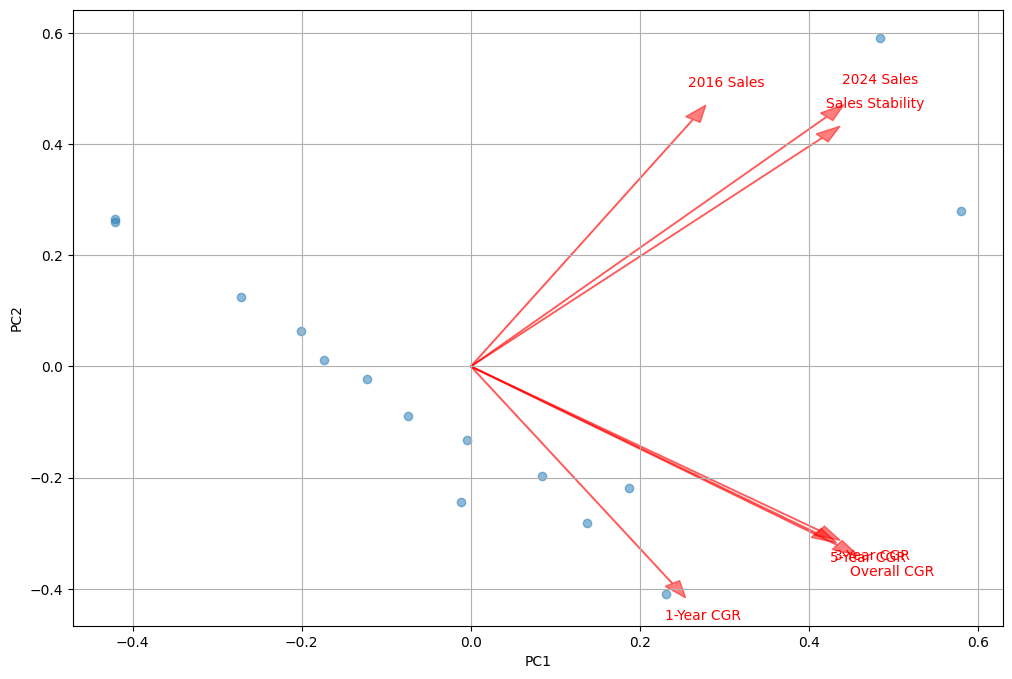

In [67]:
#Custom biplot implementation for EV sales data

def biplot(cscore, loadings, labels, var1=0, var2=1, show=True, dim=(10, 10)):

    plt.figure(figsize=dim)

    # Scaling the principal components
    xs = cscore[:, var1]
    ys = cscore[:, var2]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    xs_scaled = xs * scalex
    ys_scaled = ys * scaley

    # Ploting samples
    plt.scatter(xs_scaled, ys_scaled, alpha=0.5)

    # Ploting variable vectors
    for i in range(loadings.shape[1]):
        plt.arrow(0, 0, loadings[i, var1], loadings[i, var2],
                 color='r', alpha=0.5, head_width=0.02)
        plt.text(loadings[i, var1]*1.15, loadings[i, var2]*1.15,
                labels[i], color='r', ha='center', va='center')

    plt.xlabel(f"PC{var1+1}")
    plt.ylabel(f"PC{var2+1}")
    plt.grid()
    if show:
        plt.show()

# Geting numerical column names
numeric_cols = final_df.select_dtypes(include=[np.number]).columns.values

# Generating biplot for PC1 vs PC2
biplot(cscore=ev_pca_transformed,
       loadings=pca_model.components_.T,
       labels=numeric_cols,
       var1=0,  # PC1
       var2=1,  # PC2
       dim=(12, 8))

In [68]:
final_df.columns

Index(['Vehicle Category', '2016 Sales', '2024 Sales', '1-Year CGR',
       '3-Year CGR', '5-Year CGR', 'Overall CGR', 'Sales Stability'],
      dtype='object')

###Feature Selection for Clustering

In [69]:
colums= ['2024 Sales', '5-Year CGR','Sales Stability']
numeric_df= final_df[colums]

##Segment Clustering Using K-Means

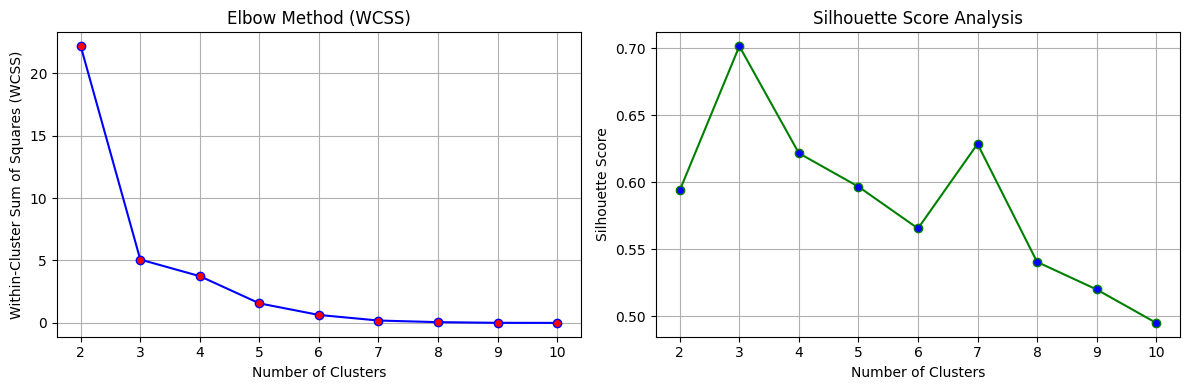

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Seting random seed for reproducibility
np.random.seed(42)

# Applying standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# Initializing storage
wcss = []
silhouette_scores = []
k_range = range(2, 11)

# Compute metrics for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Ploting results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Elbow Plot (WCSS)
ax1.plot(k_range, wcss, 'bo-', markerfacecolor='red')
ax1.set_title('Elbow Method (WCSS)')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
ax1.grid(True)

# Silhouette Score Plot
ax2.plot(k_range, silhouette_scores, 'go-', markerfacecolor='blue')
ax2.set_title('Silhouette Score Analysis')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True)

plt.tight_layout()
plt.show()



In [71]:
import plotly.express as px
from sklearn.decomposition import PCA

# Performing PCA for 3D visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Cluster with optimal k (using silhouette suggestion)
optimal_k = k_range[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Creating 3D scatter plot
fig = px.scatter_3d(
    x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
    color=clusters,
    hover_name=final_df['Vehicle Category'],
    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'},
    title=f'3D Cluster Visualization (k={optimal_k})',
    color_continuous_scale=px.colors.qualitative.Plotly
)

# Adding cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
fig.add_trace(
    px.scatter_3d(
        x=centers_pca[:, 0], y=centers_pca[:, 1], z=centers_pca[:, 2],
        text=[f"Cluster {i}" for i in range(optimal_k)]
    ).data[0].update(
        marker=dict(
            size=10,
            color='black',
            symbol='x'
        ),
        hoverinfo='text'
    )
)

# Customizing layout
fig.update_layout(
    scene=dict(
        xaxis_title=f'PC1 ({pca.explained_variance_ratio_[0]:.1%})',
        yaxis_title=f'PC2 ({pca.explained_variance_ratio_[1]:.1%})',
        zaxis_title=f'PC3 ({pca.explained_variance_ratio_[2]:.1%})'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()

## Evaluating Segment

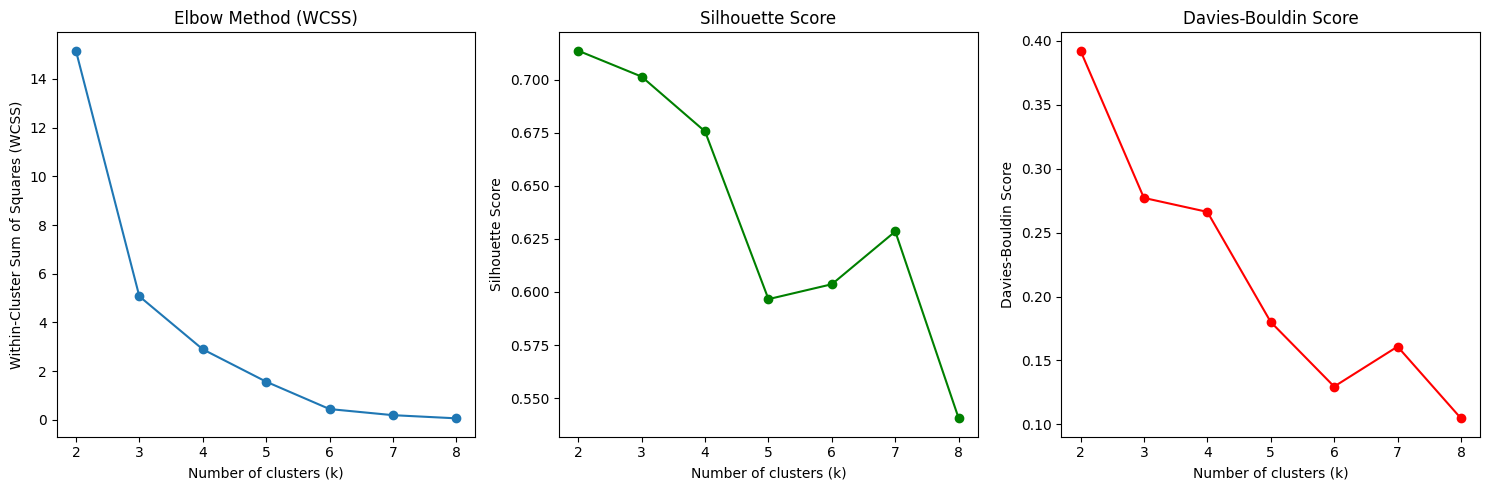

,k,Silhouette,Davies-Bouldin,WCSS
0,2,0.713645,0.392348,15.160501
1,3,0.701443,0.277162,5.073549
2,4,0.675622,0.266211,2.897903
3,5,0.596620,0.180037,1.567707
4,6,0.603638,0.129526,0.443218
5,7,0.628510,0.160819,0.192610
6,8,0.540466,0.104656,0.062369


In [72]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def evaluate_k(X, k, n_init=10):
    kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=42).fit(X)
    return {
        'k': k,
        'Silhouette': silhouette_score(X, kmeans.labels_),
        'Davies-Bouldin': davies_bouldin_score(X, kmeans.labels_),
        'WCSS': kmeans.inertia_
    }

# Evaluate for k from 2 to 8
k_values = range(2, 9)
results = [evaluate_k(X_scaled, k) for k in k_values]
results_df = pd.DataFrame(results)

# Plotting the results
plt.figure(figsize=(15, 5))

# WCSS Plot (Elbow Method)
plt.subplot(1, 3, 1)
plt.plot(results_df['k'], results_df['WCSS'], marker='o')
plt.title('Elbow Method (WCSS)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)

# Silhouette Score Plot
plt.subplot(1, 3, 2)
plt.plot(results_df['k'], results_df['Silhouette'], marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)

# Davies-Bouldin Score Plot
plt.subplot(1, 3, 3)
plt.plot(results_df['k'], results_df['Davies-Bouldin'], marker='o', color='red')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(k_values)

plt.tight_layout()
plt.show()

# Display the results table
results_df

As we can see in the above table, for K=2, the Silhouette score is higher compared to K=3. However, for K=2, the Davies-Bouldin Index and WCC are also higher compared to K=3. While K=2 may be too simple, K=3 provides a good balance between the Silhouette score and the Davies-Bouldin Index. Additionally, the sharp drop in the WCC value for K=3 indicates that it is the optimal number of clusters based on this analysis.

#### Lets Evaluate clustering using Gaussian Mixture Models (GMM) instead of K-Means

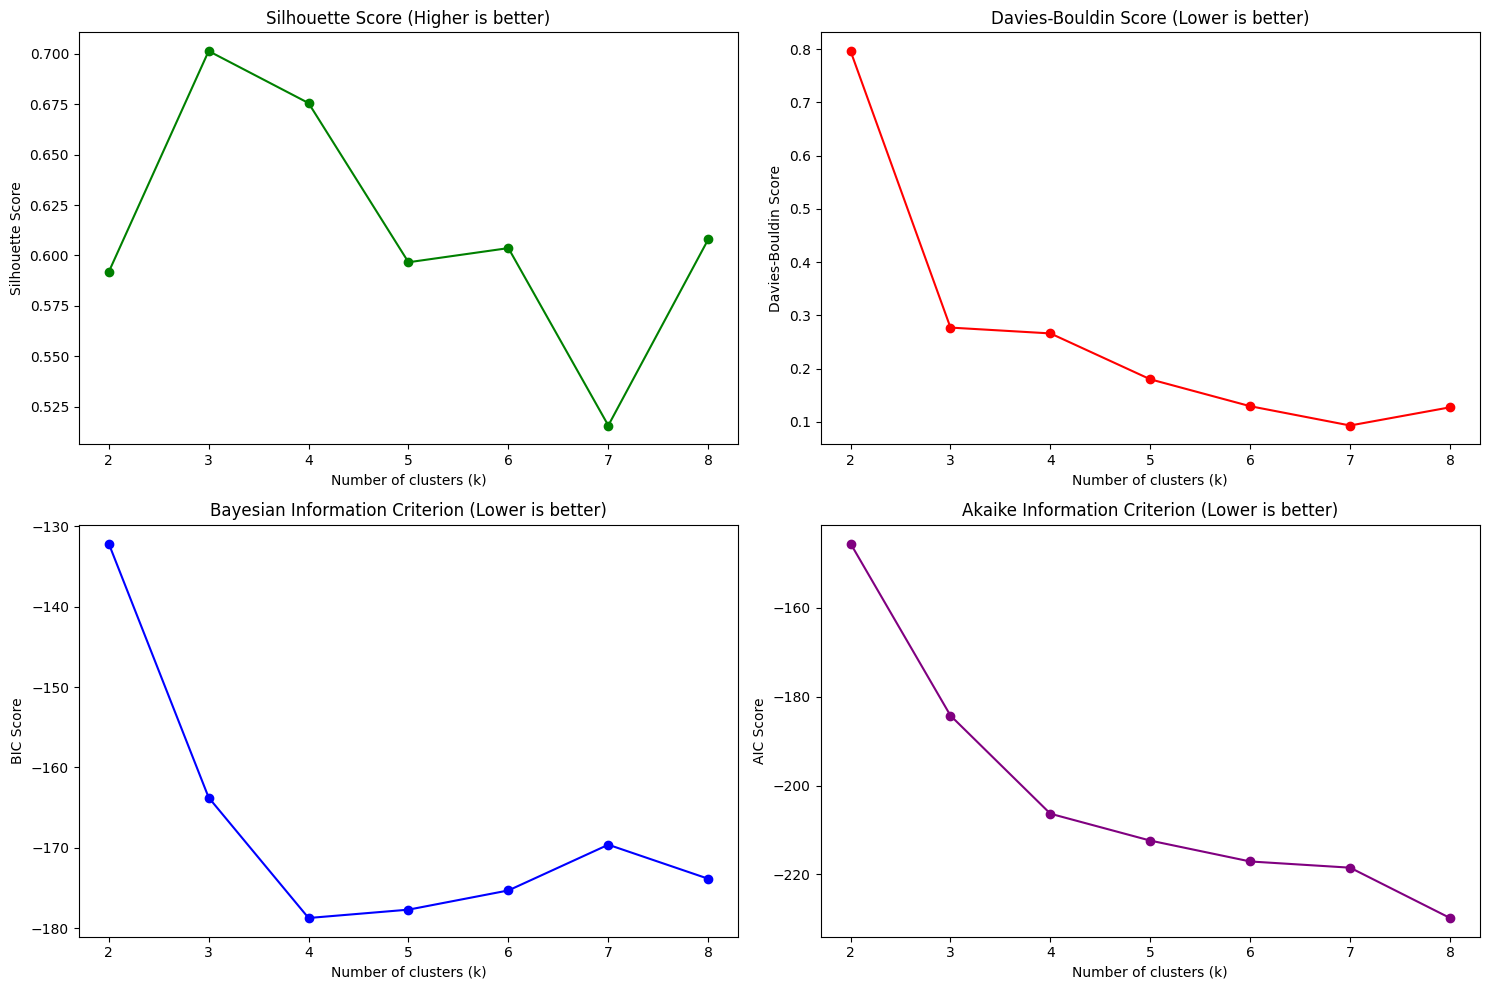

   k  Silhouette  Davies-Bouldin         BIC         AIC
0  2    0.591793        0.796456 -132.160646 -145.613599
1  3    0.701443        0.277162 -163.747136 -184.280591
2  4    0.675622        0.266211 -178.723973 -206.337931
3  5    0.596620        0.180037 -177.686261 -212.380721
4  6    0.603638        0.129526 -175.295924 -217.070886
5  7    0.515594        0.093288 -169.610831 -218.466295
6  8    0.607962        0.127445 -173.841901 -229.777867


In [73]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

def evaluate_gmm(X, k, n_init=10):
    gmm = GaussianMixture(n_components=k, n_init=n_init, random_state=42).fit(X)
    labels = gmm.predict(X)
    return {
        'k': k,
        'Silhouette': silhouette_score(X, labels),
        'Davies-Bouldin': davies_bouldin_score(X, labels),
        'BIC': gmm.bic(X),  # Bayesian Information Criterion
        'AIC': gmm.aic(X)   # Akaike Information Criterion
    }

# Evaluating for k from 2 to 8
k_values = range(2, 9)
results = [evaluate_gmm(X_scaled, k) for k in k_values]
results_df = pd.DataFrame(results)

# Plotting the results
plt.figure(figsize=(15, 10))

# Silhouette Score Plot
plt.subplot(2, 2, 1)
plt.plot(results_df['k'], results_df['Silhouette'], marker='o', color='green')
plt.title('Silhouette Score (Higher is better)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)

# Davies-Bouldin Score Plot
plt.subplot(2, 2, 2)
plt.plot(results_df['k'], results_df['Davies-Bouldin'], marker='o', color='red')
plt.title('Davies-Bouldin Score (Lower is better)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(k_values)

# BIC Plot
plt.subplot(2, 2, 3)
plt.plot(results_df['k'], results_df['BIC'], marker='o', color='blue')
plt.title('Bayesian Information Criterion (Lower is better)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('BIC Score')
plt.xticks(k_values)

# AIC Plot
plt.subplot(2, 2, 4)
plt.plot(results_df['k'], results_df['AIC'], marker='o', color='purple')
plt.title('Akaike Information Criterion (Lower is better)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('AIC Score')
plt.xticks(k_values)

plt.tight_layout()
plt.show()

# Display the results table
print(results_df)

The Silhouette score is highest at K=3 (0.7014), indicating good cluster separation, followed by K=4. The Davies-Bouldin Index is best at K=7 but remains reasonable for K=3. The Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) suggest K=4 as optimal, with diminishing improvements beyond that point. Comparing K-Means and Gaussian Mixture Model (GMM), K=3 or K=4 emerge as strong choices due to their balance across metrics, If simplicity is preferred, K=3 is perfect number for analysis

In [74]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import numpy as np

# Performing PCA for 3D visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Cluster with GMM (k=4)
gmm = GaussianMixture(n_components=4, random_state=42)
clusters = gmm.fit_predict(X_scaled)

# Creating 3D scatter plot
fig = px.scatter_3d(
    x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
    color=clusters,
    hover_name=final_df['Vehicle Category'],  # Replace with your actual label column
    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'},
    title='3D Cluster Visualization with GMM (k=4)',
    color_continuous_scale=px.colors.qualitative.Plotly
)

# Adding cluster centers (GMM uses means instead of centroids)
means_pca = pca.transform(gmm.means_)
fig.add_trace(
    px.scatter_3d(
        x=means_pca[:, 0], y=means_pca[:, 1], z=means_pca[:, 2],
        text=[f"Cluster {i}" for i in range(4)]
    ).data[0].update(
        marker=dict(
            size=10,
            color='black',
            symbol='x'
        ),
        hoverinfo='text'
    )
)

# Customizing layout with explained variance
fig.update_layout(
    scene=dict(
        xaxis_title=f'PC1 ({pca.explained_variance_ratio_[0]:.1%})',
        yaxis_title=f'PC2 ({pca.explained_variance_ratio_[1]:.1%})',
        zaxis_title=f'PC3 ({pca.explained_variance_ratio_[2]:.1%})'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()

Based on the clustering analysis and vehicle category data, we should consider K=3 or K=4 as the optimal number of clusters. The Silhouette score is highest at K=3, ensuring well-separated clusters, while K=4 is supported by BIC and AIC for optimal model complexity. according to the sales trends and growth rates, clustering into 3 or 4 groups can effectively distinguish vehicle categories based on key growth metrics such as 1-year, 3-year, and 5-year CGR, overall CGR, and sales stability. K=3 may provide a simpler segmentation, differentiating major vehicle groups with distinct sales trajectories, whereas K=4 might offer a finer classification, capturing additional market variations.



**For an EV startup, K=3 would be the better choice.**



*   K=3 provides a simpler and clearer segmentation, which is crucial for an early-stage startup to focus on key market categories.
*   The Silhouette score is highest at K=3 (0.7014), indicating well-separated clusters.
* K=4 adds complexity but does not offer a significantly better separation.
* In an EV startup, the market can typically be divided into low-growth, moderate-growth, and high-growth segments, which aligns well with K=3. According to the sales data, 2-Wheeler (NT) and 3-Wheeler (T) fall under the high-growth segment, and they are grouped into the same cluster when using K=3. This confirms that K=3 effectively captures the key market trends, making it a suitable choice for strategic decision-making.

## Profiling Segment

In [75]:
# Adding cluster labels to final_df
final_df['Cluster'] = kmeans.labels_


In [76]:
final_df.head()  #Displying data after adding cluster

,Vehicle Category,2016 Sales,2024 Sales,1-Year CGR,3-Year CGR,5-Year CGR,Overall CGR,Sales Stability,Cluster
0,4-Wheeler (IV),4,37,-21.28,131.04,0.00,32.06,17.924223,1
1,HGV,8,194,-40.67,0.00,0.00,48.97,119.068724,1
2,HMV,8,0,-100.00,-100.00,0.00,-100.00,2.948634,1
3,HPV,3,3396,41.68,54.49,55.71,140.84,1265.874807,1
4,LGV,93,5737,151.29,79.80,149.79,67.41,1829.096635,0


In [77]:
# Showing vehicle categories per cluster
print("\n" + "="*50)
print("Vehicle Categories per Cluster")
print("="*50)
for cluster in sorted(final_df['Cluster'].unique()):
    categories = final_df[final_df['Cluster'] == cluster]['Vehicle Category'].tolist()
    print(f"\nCluster {cluster} ({len(categories)} vehicles):")
    print("-"*30)
    print(categories)


Vehicle Categories per Cluster

Cluster 0 (2 vehicles):
------------------------------
['LGV', 'LMV']

Cluster 1 (11 vehicles):
------------------------------
['4-Wheeler (IV)', 'HGV', 'HMV', 'HPV', 'LPV', 'MMV', 'MPV', 'Other', '3-Wheeler (NT)', '2-Wheeler (IV)', '2-Wheeler (T)']

Cluster 2 (2 vehicles):
------------------------------
['3-Wheeler (T)', '2-Wheeler (NT)']


## Describig Segment

In [78]:
# SEGMENT ANALYSIS

# Defining the features used for clustering
features = ['2024 Sales', '5-Year CGR', 'Sales Stability']

original_means = final_df.groupby('Cluster')[features].mean()
print(original_means.round(2))

         2024 Sales  5-Year CGR  Sales Stability
Cluster                                         
0          36572.00      140.19         15739.82
1           1107.73        2.26           651.22
2         686011.00       63.81        292294.14


####Naming the segment

In [79]:
# Defining segment names based on cluster analysis
segment_names = {
    0: "Stable Performance",
    1: "Emerging Niche",
    2: "High-Growth Mass Market"
}

# Computing the mean values for each cluster
original_means = final_df.groupby('Cluster')[features].mean().round(2)

# Adding the segment name column
original_means['Segment'] = original_means.index.map(segment_names)

print(original_means)


         2024 Sales  5-Year CGR  Sales Stability                  Segment
Cluster                                                                  
0          36572.00      140.19         15739.82       Stable Performance
1           1107.73        2.26           651.22           Emerging Niche
2         686011.00       63.81        292294.14  High-Growth Mass Market


In [80]:
# Detailed segment view
print("\nDetailed Segment Composition:")
for segment, group in final_df.groupby('Cluster'):
    print(f"\n{segment}:")
    print(group[['Vehicle Category', '2024 Sales', '5-Year CGR']].sort_values('2024 Sales', ascending=False))


Detailed Segment Composition:

0:
  Vehicle Category  2024 Sales  5-Year CGR
5              LMV       67407      130.59
4              LGV        5737      149.79

1:
   Vehicle Category  2024 Sales  5-Year CGR
6               LPV        6434       55.79
3               HPV        3396       55.71
14    2-Wheeler (T)        1780        4.26
10   3-Wheeler (NT)         273       15.30
1               HGV         194        0.00
8               MPV          37      -22.22
0    4-Wheeler (IV)          37        0.00
7               MMV          20        0.00
12   2-Wheeler (IV)          11      -17.62
9             Other           3      -66.32
2               HMV           0        0.00

2:
   Vehicle Category  2024 Sales  5-Year CGR
13   2-Wheeler (NT)      727021       90.56
11    3-Wheeler (T)      645001       37.06


<Figure size 1600x1000 with 0 Axes>

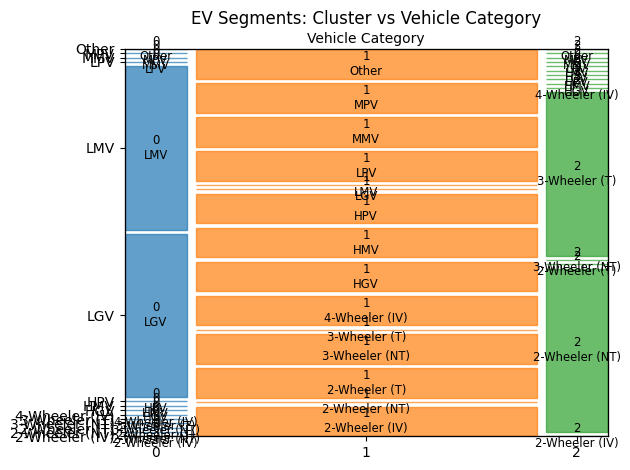

In [81]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# 1. Create cross-tabulation
cluster_category_ct = pd.crosstab(
    index=final_df['Cluster'],
    columns=final_df['Vehicle Category']
)

# 2. Select ONLY categories that exist in clusters
valid_categories = cluster_category_ct.columns[cluster_category_ct.sum() > 0]  # Filter zero columns
filtered_ct = cluster_category_ct[valid_categories]

# 3. Plot with error handling
plt.figure(figsize=(16, 10))
try:
    mosaic(
        filtered_ct.stack(),
        gap=0.02,
        title='EV Segments: Cluster vs Vehicle Category',
        axes_label=True,
        properties=lambda k: {'color': f'C{k[0]}', 'alpha': 0.7}
    )
    plt.ylabel("Cluster")
    plt.xlabel("Vehicle Category")
    plt.tight_layout()
    plt.show()
except ValueError as e:
    print(f"Plotting failed: {e}")
    print("\nProblematic data:")
    print(filtered_ct)

##Strategic Segment Identification (Targeting Segment)

In [82]:
# Geting cluster profiles (original scale)
cluster_profile = final_df.groupby('Cluster').agg({
    '2024 Sales': 'mean',
    '5-Year CGR': 'mean',
    'Sales Stability': 'mean',
    'Vehicle Category': lambda x: x.mode()[0]
}).rename(columns={
    '2024 Sales': 'Avg_Sales',
    '5-Year CGR': 'Avg_Growth',
    'Vehicle Category': 'Dominant_Category'
})

# Adding segment size
cluster_profile['Segment_Size'] = final_df['Cluster'].value_counts().sort_index()

# Calculating business priority score (custom metric)
cluster_profile['Priority_Score'] = (
    0.4 * cluster_profile['Avg_Sales']/cluster_profile['Avg_Sales'].max() +
    0.5 * cluster_profile['Avg_Growth']/cluster_profile['Avg_Growth'].max() +
    0.1 * (1 - cluster_profile['Sales Stability']/cluster_profile['Sales Stability'].max())
)

# Sorting by priority
priority_segments = cluster_profile.sort_values('Priority_Score', ascending=False)
priority_segments.round(2)

,Avg_Sales,Avg_Growth,Sales Stability,Dominant_Category,Segment_Size,Priority_Score
Cluster,,,,,,
2,686011.00,63.81,292294.14,2-Wheeler (NT),2,0.63
0,36572.00,140.19,15739.82,LGV,2,0.62
1,1107.73,2.26,651.22,2-Wheeler (IV),11,0.11


####A. High-Priority Segments (Invest)

In [83]:
high_priority = priority_segments[priority_segments['Priority_Score'] > 0.62]
print("\nHigh-Priority Segments:")
print(high_priority[['Dominant_Category', 'Avg_Sales', 'Avg_Growth']])


High-Priority Segments:
        Dominant_Category  Avg_Sales  Avg_Growth
Cluster                                         
2          2-Wheeler (NT)   686011.0       63.81


####B. Medium-Priority (Maintain)

In [84]:
medium_priority = priority_segments[(priority_segments['Priority_Score'] > 0.3) &
                                   (priority_segments['Priority_Score'] <= 0.62)]

medium_priority

,Avg_Sales,Avg_Growth,Sales Stability,Dominant_Category,Segment_Size,Priority_Score
Cluster,,,,,,
0,36572.0,140.19,15739.815823,LGV,2,0.61594


####C. Low-Priority (Evaluate)

In [85]:
low_priority = priority_segments[priority_segments['Priority_Score'] <= 0.3]
low_priority

,Avg_Sales,Avg_Growth,Sales Stability,Dominant_Category,Segment_Size,Priority_Score
Cluster,,,,,,
1,1107.727273,2.263636,651.217064,2-Wheeler (IV),11,0.108497


##Conclusion

Startups should focus on Cluster 2 (High-Growth Mass Market) for maximum returns, expanding in the 2-Wheeler (NT) category through innovation and competitive pricing. Cluster 0 (Stable Performance) offers strong potential in the LGV segment for commercial transport, making it a strategic investment. In contrast, Cluster 1 (Emerging Niche) shows limited growth, requiring minimal investment unless market conditions improve. Further research is needed to assess future demand. Prioritizing high-growth and stable markets while cautiously monitoring niche opportunities will help startups build a strong presence in the EV industry.